In [2]:
!pip install bokeh hvplot
!pip install Cartopy
!pip install geoviews
!pip install pyproj
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [3]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import time


# Import API key
from api_keys import geoapify_key



In [4]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"


# Read the  data 
disaster_metadata = pd.read_csv(disaster_path)



disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [5]:

disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [6]:
disaster_metadata=disaster_metadata.drop(columns=['Glide','Seq','Disaster Subtype', 'Disaster Subsubtype','Event Name','Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'ISO', 'Start Day','End Day','CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'])
# also drop the columns named- Latitude and Longitude. 

In [7]:
disaster_metadata.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,1970,1.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,1970,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,1970,11.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,1970,4.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN


In [8]:
disaster_metadata_type_df=disaster_metadata['Disaster Type'].unique()
disaster_metadata_type_df

array(['Flood', 'Storm', 'Drought', 'Landslide', 'Earthquake', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Extreme temperature ',
       'Volcanic activity', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [9]:
# drop any duplicate values
disaster_metadata_df= disaster_metadata.drop_duplicates()
disaster_metadata_df.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,1970,1.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,1970,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,1970,11.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,1970,4.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN


In [10]:

# Function to get latitude and longitude of a country
def get_country_lat_long(country, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = response.json()
        if data['features']:
            latitude = data['features'][0]['geometry']['coordinates'][1]
            longitude = data['features'][0]['geometry']['coordinates'][0]
            return latitude, longitude
        else:
            print(f"No results found for {country}. Response: {data}")
            return None, None
    except requests.RequestException as e:
        print(f"Error fetching data for {country}. Error: {e}")
        return None, None

# Your API key
api_key = geoapify_key

# Ensure columns for latitude and longitude are initialized
if 'Lat' not in disaster_metadata_df.columns:
    disaster_metadata_df["Lat"] = None
if 'Lng' not in disaster_metadata_df.columns:
    disaster_metadata_df["Lng"] = None

# Get latitudes and longitudes for each country and update DataFrame
for index, row in disaster_metadata_df.iterrows():
    country = row['Country']
    lat, long = get_country_lat_long(country, api_key)
    if lat is not None and long is not None:
        print(f"{country}: Latitude = {lat}, Longitude = {long}")
        disaster_metadata_df.at[index, 'Lat'] = lat
        disaster_metadata_df.at[index, 'Lng'] = long
    else:
        print(f"Could not get coordinates for {country}")
        
# Verify that no extra rows labeled 'Lat' and 'Lng' are present
if 'Lat' in disaster_metadata_df.index:
    disaster_metadata_df.drop('Lat', inplace=True)
if 'Lng' in disaster_metadata_df.index:
    disaster_metadata_df.drop('Lng', inplace=True)

print(disaster_metadata_df)
    

Argentina: Latitude = -34.9964963, Longitude = -64.9672817
Australia: Latitude = -24.7761086, Longitude = 134.755
Benin: Latitude = 9.5293472, Longitude = 2.2584408
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Brazil: Latitude = -10.3333333, Longitude = -53.2
Brazil: Latitude = -10.3333333, Longitude = -53.2
Barbados: Latitude = 13.1500331, Longitude = -59.5250305
Botswana: Latitude = -23.1681782, Longitude = 24.5928742
Canada: Latitude = 61.0666922, Longitude = -107.991707
Switzerland: Latitude = 46.7985624, Longitude = 8.2319736
China: Latitude = 35.000074, Longitude = 104.999927
China: Latitude = 35.000074, Longitude = 104.999927
Côte d’Ivoire: Latitude = 7.9897371, Longitude = -5.5679458
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Co

In [11]:
disaster_metadata_df

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),Lat,Lng
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,-34.996496,-64.967282
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0,-24.776109,134.755
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,9.529347,2.258441
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0,24.476929,90.293441
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN,24.476929,90.293441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14639,2021-0449-YEM,2021,Natural,Hydrological,Flood,Yemen,Western Asia,Asia,"Dhamar, Amran, Al Mahwit, Marib, Ibb, Sana’a C...",NaN,...,11.0,NaN,67980.0,NaN,67980.0,NaN,NaN,NaN,16.347124,47.891527
14640,2021-0075-ZAF,2021,Natural,Hydrological,Flood,South Africa,Southern Africa,Africa,"Mpumalanga Province, Free State Province and t...",NaN,...,31.0,NaN,400.0,NaN,400.0,NaN,NaN,75000.0,-28.816624,24.991639
14641,2021-0599-COD,2021,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,Tshopo province,NaN,...,131.0,301.0,NaN,NaN,301.0,NaN,NaN,NaN,-2.981434,23.822264
14642,2021-0020-SRB,2021,Natural,Hydrological,Flood,Serbia,Southern Europe,Europe,"Zitoradja (Toplicki), Doljevac (Nisavski) , Di...",NaN,...,NaN,NaN,22.0,NaN,22.0,NaN,NaN,NaN,44.153412,20.55144


In [15]:
%%capture --no-display
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use lng/lat)
#show number of death based on size of circles in map


# Ensure the correct data types
disaster_metadata_df['Lat'] = pd.to_numeric(disaster_metadata_df['Lat'], errors='coerce')
disaster_metadata_df['Lng'] = pd.to_numeric(disaster_metadata_df['Lng'], errors='coerce')
disaster_metadata_df['Total Deaths'] = pd.to_numeric(disaster_metadata_df['Total Deaths'], errors='coerce')
disaster_metadata_df['Country'] = disaster_metadata_df['Country'].astype(str)
disaster_metadata_df['Disaster Type'] = disaster_metadata_df['Disaster Type'].astype(str)

# Drop rows with NaN values in Lat, Lng, or Total Deaths
disaster_metadata_df.dropna(subset=['Lat', 'Lng', 'Total Deaths'], inplace=True)

# Ensure there are no mixed types in any columns
print(disaster_metadata_df.dtypes)

# Configure the map plot
map_plot = disaster_metadata_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True,
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    size='Total Deaths',
    scale=0.1,
    color='Country',
    hover_cols=['Disaster Type']
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Country,Total Deaths,Disaster Type)

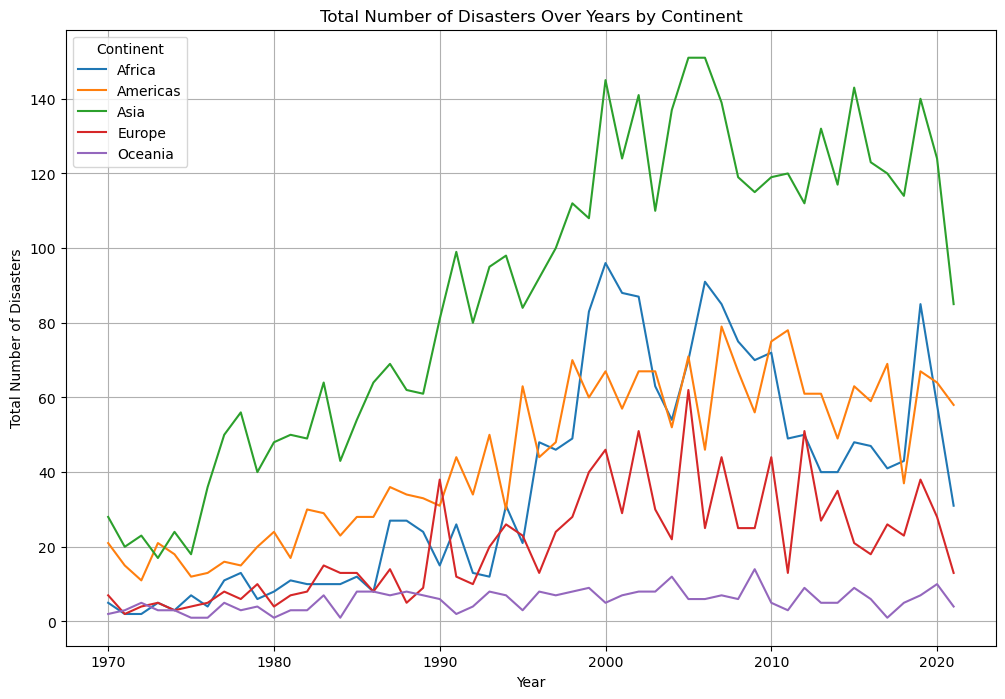

In [18]:
#plot line chart for total number of disasters over years against continents

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = disaster_metadata_df.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

for continent in disasters_per_year_continent.columns:
    plt.plot(disasters_per_year_continent.index, disasters_per_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters Over Years by Continent')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

In [19]:

# Summary Statistics
summary_stats = disaster_metadata_df.describe()

summary_stats



,Year,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),Lat,Lng
count,10199.000000,10199.000000,10121.000000,10199.000000,10100.000000,10199.000000,3.191000e+03,6.182000e+03,1.733000e+03,7.942000e+03,2.800000e+01,8.140000e+02,3.768000e+03,10199.000000,10199.000000
mean,2001.995588,2002.000196,6.499555,2002.030395,6.618812,361.813119,2.768539e+03,8.844008e+05,9.101243e+04,7.093836e+05,2.610954e+06,9.714826e+05,9.055108e+05,20.085622,31.171371
std,12.375320,12.375665,3.374958,12.382591,3.340445,6495.045853,3.633504e+04,7.865762e+06,5.990259e+05,7.063373e+06,5.463589e+06,3.473425e+06,5.532790e+06,21.294671,79.802412
min,1970.000000,1970.000000,1.000000,1970.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.510000e+03,4.100000e+01,2.000000e+00,-41.500083,-176.204224
25%,1994.000000,1994.000000,4.000000,1994.000000,4.000000,5.000000,1.500000e+01,1.500000e+03,8.000000e+02,6.650000e+02,1.300000e+04,6.250000e+04,1.094125e+04,7.869943,-10.708359
50%,2003.000000,2003.000000,7.000000,2003.000000,7.000000,16.000000,5.400000e+01,1.226000e+04,4.000000e+03,6.603000e+03,1.940000e+05,2.005000e+05,8.799500e+04,22.351115,38.431398
75%,2012.000000,2012.000000,9.000000,2012.000000,9.000000,50.000000,2.000000e+02,1.000000e+05,2.360000e+04,6.697100e+04,1.812500e+06,6.632500e+05,4.200000e+05,35.000074,104.999927
max,2021.000000,2021.000000,12.000000,2021.000000,12.000000,300000.000000,1.800000e+06,3.000000e+08,1.585000e+07,3.000000e+08,2.500000e+07,6.000000e+07,2.100000e+08,64.984182,179.158292


In [20]:
# Frequency Distribution
frequency_distribution = disaster_metadata_df['Continent'].value_counts()
frequency_distribution

Continent
Asia        4606
Americas    2288
Africa      1932
Europe      1080
Oceania      293
Name: count, dtype: int64

In [21]:

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = disaster_metadata_df.groupby(['Year', 'Continent']).size().unstack(fill_value=0)
disasters_per_year_continent

Continent,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1970,5,21,28,7,2
1971,2,15,20,2,3
1972,2,11,23,4,5
1973,5,21,17,5,3
1974,3,18,24,3,3
1975,7,12,18,4,1
1976,4,13,36,5,1
1977,11,16,50,8,5
1978,13,15,56,6,3


In [22]:

# Trend Analysis
trend_analysis = disasters_per_year_continent.describe()
trend_analysis

Continent,Africa,Americas,Asia,Europe,Oceania
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,44.000000,88.576923,20.769231,5.634615
std,29.020875,20.771398,40.561909,14.697759,2.883549
min,2.000000,11.000000,17.000000,2.000000,1.000000
25%,10.750000,27.000000,53.000000,8.000000,3.000000
50%,31.000000,45.000000,96.500000,19.000000,6.000000
75%,55.000000,63.000000,120.000000,28.000000,8.000000
max,96.000000,79.000000,151.000000,62.000000,14.000000
